<a href="https://colab.research.google.com/github/SLMath/pandas-dataframe/blob/main/Soccer_Olimpic_Games_Python_POO_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulação da Copa de Futebol das Olimpíadas!**

## **Objetivo**

Investigar as probabilidades dos resultados de futebol nas Olimpíadas de Tóquio 2021, respondendo as perguntas:

1. Qual seleção é mais provável ser campeã?
2. Quais as probabilidades das seleções avançarem para segunda fase?
3. Quais as probabilidades das seleções ficarem em 1º, 2º, 3º e 4º em seus grupos na primeira fase?
4. A força de uma equipe é proporcional a sua probabilidade de vencer a competição? Se não, porquê?
5. Qual a probabilidade de todos cabeça de chave passarem simultâneamente para a segunda fase? (Probabilidade da 'zebra')

6. Qual a probabilidade de pelo menos uma das quatro seleções mais fracas ganhar a competição?
7. Qual a probabilidade de vencer a competição por confederação?
8. Qual a probabilidade de uma seleção sem medalhas em sua história vencer a competição?

9. Se o Brasil jogar com a Alemanha, qual a probabilidade de acontecer um 7x1 para a Alemanha? E um 7x1 para o Brasil? Quais os placares mais prováveis?
10. Qual a probabilidade de cada grupo apresentar um campeão?

## **Importação dos Dados**

In [2]:
import pandas as pd

data = pd.read_csv('https://github.com/SLMath/pandas-dataframe/blob/main/dados-futebol-olimpiada.csv', index_col=0)
display(data)
data.info()

,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0
5,México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0
6,Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1
7,Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0
8,Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0
9,Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0
10,Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 16
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   País                    16 non-null     object
 1   Nome FIFA               16 non-null     object
 2   Grupo                   16 non-null     object
 3   Confederação            16 non-null     object
 4   Bandeira                16 non-null     object
 5   Cabeça-de-chave         16 non-null     object
 6   Ranking FIFA (07/04)    16 non-null     int64 
 7   Pontuação FIFA (07/04)  16 non-null     int64 
 8   Ouros                   16 non-null     int64 
 9   Pratas                  16 non-null     int64 
 10  Bronzes                 16 non-null     int64 
dtypes: int64(5), object(6)
memory usage: 1.5+ KB


## **Gráficos dos Grupos**



In [ ]:
import matplotlib.pyplot as plt

def plotGroup(group):
    # filter the teams on the selected group
    groupData = data.loc[data['Grupo'] == group]
    assert groupData.size != 4, "the group must have 4 elements"
    # Initizalize image
    fig = plt.figure(figsize = (4, 3), facecolor='#FFFDEC')
    # Subplot 4 images as a four-point square on the figure, one for each country
    for i in range(4):
        # define which image we are working at and erase its axes
        image = plt.subplot(2, 2, i + 1)
        image.get_xaxis().set_visible(False)
        image.get_yaxis().set_visible(False)
        # get the country name
        plt.title(groupData['País'].iloc[i], size = 10)
        # get the country flag image
        plt.imshow(plt.imread(groupData['Bandeira'].iloc[i]))
    # Gather then all
    plt.tight_layout(w_pad = 2)
    plt.suptitle('Grupo ' + group, size = 14, y = 1.05)
    # plt.savefig('grupo' + grupo + '.png', transparent = True)

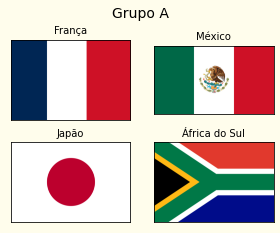

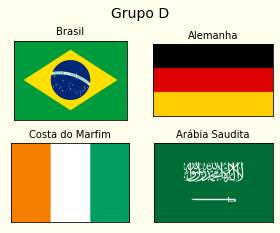

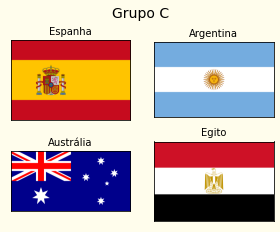

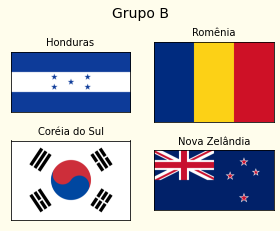

In [ ]:
for group in data['Grupo'].unique():
  plotGroup(group)

## **Modelando o resultado de um jogo**

Assume-se que a distribuição de gols numa partida por uma equipe siga uma distribuiçao Poisson, pois queremos determinar a probabilidade para cada número (inteiro não negativo) de gols por partida (um intervalo de 90 minutos). Portanto deve-se ter como premissa:

1. O adversário não influencia o resultado da equipe, assim a probabilidade mantem-se a mesma em toda partida
2. Os jogos passados não influenciam o jogo presente, assim os eventos são independentes entre si.

Logo, estimar a média dessa distribuição, correspondente ao parâmetro lambda, significa estimar a média do número de gols da equipe em uma partida. Induziremos esse número a partir da Pontuação FIFA (07/04/21) pensando que esse dado não varia muito além de 1 para as equipes.  

,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes,Avg Score
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0,1.500000
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2,1.474497
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0,1.319660
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0,1.308473
5,México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0,1.289407
6,Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1,1.257940
7,Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0,0.900045
8,Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0,1.106436
9,Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0,1.020198
10,Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0,1.035746


,score,counts,P(%)
0,0,23038,23.038
1,1,33651,33.651
2,2,25034,25.034
3,3,12200,12.200
4,4,4404,4.404
5,5,1272,1.272
6,6,319,0.319
7,7,70,0.070
8,8,11,0.011
9,9,1,0.001


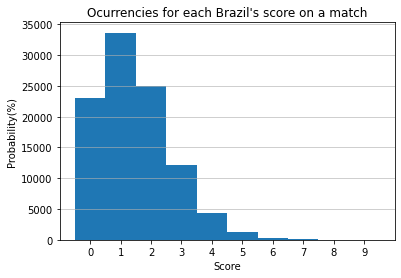

In [ ]:
from scipy.stats import poisson
import numpy as np

# set a max score for the best team
maxMeanScore = 1.5
# redistribute the FIFA score to be the average score on a match
maxFIFAScore = max(data['Pontuação FIFA (07/04)'])
data['Avg Score'] = maxMeanScore * ((data['Pontuação FIFA (07/04)'] / maxFIFAScore) ** 2)
display(data)

# avaliating simulated data
# simulate
numSimTimes = 100000
brazilAvgScore = data.loc[data['País'] == 'Brasil']['Avg Score']
brazilSimScores = pd.DataFrame(
    data= poisson.rvs(mu= brazilAvgScore, size= numSimTimes),
    columns = ['score'])
# plot histogram table
sumBrazilSimScores = brazilSimScores.groupby(['score']).size().reset_index(name= 'counts')
sumBrazilSimScores['P(%)'] = sumBrazilSimScores['counts'] * 100 / numSimTimes
print() # jump line
display(sumBrazilSimScores)
# plot histogram graph
histBins = np.array(range(min(sumBrazilSimScores['score']),
                          max(sumBrazilSimScores['score']) + 2)) - 0.5
brazilSimScores['score'].plot.hist(bins= histBins, xticks= sumBrazilSimScores['score'])
plt.title('Ocurrencies for each Brazil\'s score on a match')
plt.xlabel('Score')
plt.ylabel('Probability(%)')
plt.grid(axis='y', alpha=0.75)

É notável que existe uma clara tendência em marcar 1 gol apenas ($\approx 34\%$), tendendo mais a ser 2 que 0, como era esperado pela média de gols derivada da pontuação FIFA

Logo podemos simular uma partida entre duas equipes com esse modelo

In [ ]:
import random
random.seed()

class Team:
  def __init__(self, name: str, avgScore: float = -1):
    self.name = name
    self.avgScore = avgScore if avgScore != -1 else float(data.loc[data['País'] == self.name]['Avg Score'])
    self.accGoals = 0
    self.goalDiff = 0
    self.points = 0

  def getMatchScore(self):
    self.lastScore = poisson.rvs(mu= self.avgScore, size = 1)[0]
    self.accGoals += self.lastScore
    return self.lastScore

  def getPenaltiesScore(self, knockout: bool = False): # famous "mata-mata"
    return random.randrange(2) if knockout else sum([random.randrange(2) for i in range(5)])

  def win(self, matchGoalDiff: int):
    self.points += 2
    self.goalDiff += matchGoalDiff

  def tie(self):
    self.points += 1

  def lose(self, matchGoalDiff: int):
    self.goalDiff -= matchGoalDiff

  # overloading operator * to simulate a non-knockout match
  # return: string to display match result, the winner (or 0 if a tie)
  def __mul__(self, other):
    # get match result as goal diff
    matchGoalDiff = self.getMatchScore() - other.getMatchScore()
    # determine match result
    if matchGoalDiff > 0:
      winner, loser = self, other
    elif matchGoalDiff < 0:
      winner, loser = other, self
    else:
      winner = 'none'
      loser = 'none'
    # update team values and write match result
    if winner != 'none':
      winner.win(matchGoalDiff)
      loser.lose(matchGoalDiff)
      result = '{} {} x {} {}'.format(winner.name, winner.lastScore, loser.lastScore, loser.name)
    else:
      self.tie()
      other.tie()
      result = '{} {} x {} {}'.format(self.name, self.lastScore, other.lastScore, other.name)
    # return values
    return result, winner, loser

  # overloading operator ^ to simulate a knockout match
  # return: string to display match result, the winner
  def __xor__(self, other):
    strResult, winner, loser = self * other
    if winner == 'none': # match ended as tie
      # get penaulties scores for each team
      selfPenaltyScore = self.getPenaltiesScore()
      otherPenaltyScore = other.getPenaltiesScore()
      while winner == 'none': # match is on penalties
        # determines who has won
        if selfPenaltyScore > otherPenaltyScore:
          winner, loser = self, other
          winnerPenaltyScore, loserPenaltyScore = selfPenaltyScore, otherPenaltyScore
        elif selfPenaltyScore < otherPenaltyScore:
          winner, loser = other, self
          winnerPenaltyScore, loserPenaltyScore = otherPenaltyScore, selfPenaltyScore
        else:
          selfPenaltyScore += self.getPenaltiesScore(knockout= True)
          otherPenaltyScore += bool(other.getPenaltiesScore(knockout= True))
      strResult = '{} {} ({}) x {} {} ({})'.format(
          winner.name, winner.lastScore, winnerPenaltyScore,
          loser.lastScore, loser.name, loserPenaltyScore)
    # return values
    return strResult, winner, loser

  # overloading converter to string for printing purpouses
  def __str__(self):
    return 'name: {}, points: {}, goalDiff {}, accGoals: {}'.format(
        self.name, self.points, self.goalDiff, self.accGoals
    )

# create two teams
myTeam = Team('Brasil')
theirTeam = Team('Egito')
print(myTeam)
print(theirTeam)

# simulate a non-knockout match
result, winner, loser = myTeam * theirTeam
print()
print('A Simple Match')
print(result)
print('winner:', winner)
print('loser:', loser)

# simulate a knockout match
result, winner, loser = myTeam ^ theirTeam
print()
print('A Knockout Match')
print(result)
print('winner:', winner)
print('loser:', loser)


name: Brasil, points: 0, goalDiff 0, accGoals: 0
name: Egito, points: 0, goalDiff 0, accGoals: 0

A Simple Match
Egito 1 x 0 Brasil
winner: name: Egito, points: 2, goalDiff -1, accGoals: 1
loser: name: Brasil, points: 0, goalDiff 1, accGoals: 0

A Knockout Match
Brasil 1 x 0 Egito
winner: name: Brasil, points: 2, goalDiff 2, accGoals: 1
loser: name: Egito, points: 2, goalDiff -2, accGoals: 1


## **Simulação dos jogos de futebol nas Olimpíadas**



Primeiro, os times passam pela fase de grupo. Nela, cada time joga contra os outros 3 membros do grupo e os 2 melhores são classificados para as quartas de final

In [ ]:
# returns the two classified as a DataFrame
def simulateGroupMatches(data, group: str, verbose: bool = True):
  # get Group Data
  if verbose: print('Grupo', group)
  groupData = data.loc[data['Grupo'] == group]
  assert groupData.size != 4, "the group must have 4 elements"
  # get teams from group
  groupTeams = []
  for i, team in groupData.iterrows():
    groupTeams.append(Team(name= team['País']))
  # simulate each match on the group
  groupRivals = groupTeams.copy()
  for team1 in groupTeams:
    groupRivals.remove(team1)
    for team2 in groupRivals:
      result, _, _ = team1 * team2
      if verbose: print(result)
  # get teams from group
  dfGroupTeams = pd.DataFrame([vars(teamObj) for teamObj in groupTeams])
  dfGroupTeams['group'] = group
  dfGroupTeams.sort_values(['points', 'goalDiff', 'accGoals'],
                           ascending= False,
                           inplace= True,
                           ignore_index= True)
  dfGroupTeams['classification'] = dfGroupTeams.index + 1
  if verbose: display(dfGroupTeams)
  return dfGroupTeams[['group', 'classification', 'name', 'avgScore']].loc[dfGroupTeams['classification'] <= 2]

# returns the two classified from each group in a df
def simulateGroupPhase(data, verbose: bool = True):
  dfClassifieds = pd.DataFrame()
  for group in np.sort(data['Grupo'].unique()):
    groupeClassifieds = simulateGroupMatches(data, group, verbose)
    dfClassifieds = dfClassifieds.append(groupeClassifieds, ignore_index= True)
    if verbose: print()
  if verbose: print('Classified Teams')
  if verbose: display(dfClassifieds)
  return dfClassifieds

classifiedTeams = simulateGroupPhase(data)


Grupo A
França 1 x 1 México
França 2 x 2 Japão
França 2 x 0 África do Sul
Japão 1 x 0 México
México 4 x 1 África do Sul
Japão 2 x 1 África do Sul


,name,avgScore,accGoals,goalDiff,points,lastScore,group,classification
0,Japão,1.106436,5,0,5,2,A,1
1,França,1.500000,5,2,4,2,A,2
2,México,1.289407,5,4,3,4,A,3
3,África do Sul,0.853060,2,-6,0,1,A,4



Grupo B
Romênia 4 x 0 Honduras
Coréia do Sul 2 x 1 Honduras
Honduras 2 x 0 Nova Zelândia
Romênia 2 x 1 Coréia do Sul
Romênia 2 x 0 Nova Zelândia
Coréia do Sul 1 x 0 Nova Zelândia


,name,avgScore,accGoals,goalDiff,points,lastScore,group,classification
0,Romênia,1.020198,8,-1,6,2,B,1
1,Coréia do Sul,1.035746,4,-1,4,1,B,2
2,Honduras,0.900045,3,7,2,2,B,3
3,Nova Zelândia,0.641487,0,-5,0,0,B,4



Grupo C
Espanha 0 x 0 Argentina
Austrália 1 x 0 Espanha
Egito 2 x 1 Espanha
Austrália 2 x 0 Argentina
Egito 3 x 0 Argentina
Austrália 0 x 0 Egito


,name,avgScore,accGoals,goalDiff,points,lastScore,group,classification
0,Austrália,1.031494,3,-3,5,0,C,1
1,Egito,0.996400,5,-4,5,0,C,2
2,Argentina,1.308473,0,5,1,0,C,3
3,Espanha,1.319660,1,2,1,1,C,4



Grupo D
Brasil 2 x 0 Alemanha
Brasil 1 x 1 Costa do Marfim
Brasil 0 x 0 Arábia Saudita
Costa do Marfim 2 x 0 Alemanha
Alemanha 0 x 0 Arábia Saudita
Costa do Marfim 3 x 1 Arábia Saudita


,name,avgScore,accGoals,goalDiff,points,lastScore,group,classification
0,Costa do Marfim,0.930722,6,0,5,3,D,1
1,Brasil,1.474497,3,2,4,0,D,2
2,Arábia Saudita,0.904017,1,-2,2,1,D,3
3,Alemanha,1.257940,0,0,1,0,D,4



Classified Teams


,group,classification,name,avgScore
0,A,1,Japão,1.106436
1,A,2,França,1.500000
2,B,1,Romênia,1.020198
3,B,2,Coréia do Sul,1.035746
4,C,1,Austrália,1.031494
5,C,2,Egito,0.996400
6,D,1,Costa do Marfim,0.930722
7,D,2,Brasil,1.474497


O restante dos jogo são mata-mata na configuração:

Quartas de Final\
Q1: 1A vs 2B\
Q2: 1B vs 2A\
Q3: 1C vs 2D\
Q4: 1D vs 2C

Semi-Final\
S1: Vencedor(Q1) x Vencedor(Q2)\
S2: Vencedor(Q3) x Vencedor(Q4)

Final\
Vencedor(S1) x Vencedor(S2)

In [ ]:
# simulate quarter finals
def simulateQuarters(dfTeams, verbose: bool = True):
  if verbose: print('QUARTER FINALS')
  dictQuarter = [
      { 'id' : 'Q1', 'team1' : { 'group' : 'A', 'classif' : 1 }, 'team2' : { 'group' : 'B', 'classif' : 2 }},
      { 'id' : 'Q2', 'team1' : { 'group' : 'B', 'classif' : 1 }, 'team2' : { 'group' : 'A', 'classif' : 2 }},
      { 'id' : 'Q3', 'team1' : { 'group' : 'C', 'classif' : 1 }, 'team2' : { 'group' : 'D', 'classif' : 2 }},
      { 'id' : 'Q4', 'team1' : { 'group' : 'D', 'classif' : 1 }, 'team2' : { 'group' : 'C', 'classif' : 2 }},
  ]
  dictSemifinalists = []
  for quarter in dictQuarter:
      # get team 1 data
      team1Data = dfTeams.loc[(dfTeams['group'] == quarter['team1']['group']) &
                            (dfTeams['classification'] == quarter['team1']['classif'])]
      team1 = Team(name= team1Data['name'].any(), avgScore= float(team1Data['avgScore']))
      # get team 2 data
      team1Data = dfTeams.loc[(dfTeams['group'] == quarter['team2']['group']) &
                            (dfTeams['classification'] == quarter['team2']['classif'])]
      team2 = Team(name= team1Data['name'].any(), avgScore= float(team1Data['avgScore']))
      # knockout match
      result, winner, loser = team1 ^ team2
      dictSemifinalists.append({ 'data' : winner, 'quarter' : quarter['id'] })
      if verbose: print(result)

  # plot table to display semifinalists
  dfSemifinalists = pd.DataFrame([{ 'team' : semifinalist['data'].name,
                         'quarter' : semifinalist['quarter'] } for semifinalist
                         in dictSemifinalists])
  dfSemifinalists = dfSemifinalists.set_index('quarter')
  if verbose: display(dfSemifinalists)

  # return results
  return dictSemifinalists, dfSemifinalists

# simulate semifinals
def simulateSemifinals(dictSemifinalists: dict, verbose: bool = True):
  if verbose:
    print('SEMIFINALS')
  dictSemifinal = [
      { 'id' : 'S1', 'team1' : 'Q1', 'team2' : 'Q2' },
      { 'id' : 'S2', 'team1' : 'Q3', 'team2' : 'Q4' }
  ]
  dictFinalists = []
  for semifinal in dictSemifinal:
      # get team 1 data
      dictTeam1 = list(filter(lambda semifinalist:
                              semifinalist['quarter'] == semifinal['team1'],
                              dictSemifinalists))[0]
      team1 = dictTeam1['data'];
      # get team 2 data
      dictTeam2 = list(filter(lambda semifinalist:
                              semifinalist['quarter'] == semifinal['team2'],
                              dictSemifinalists))[0]
      team2 = dictTeam2['data'];
      # knockout match
      result, winner, loser = team1 ^ team2
      dictFinalists.append({ 'data' : winner, 'victory' : True, 'semifinal' : semifinal['id'] })
      dictFinalists.append({ 'data' : loser, 'victory' : False, 'semifinal' : semifinal['id'] })
      if verbose: print(result)

  # return results
  return dictFinalists

# simulate finals
def simulateFinals(dictFinalists: dict, verbose: bool = True):
  if verbose:
    print()
    print('FINALS')
  dictFinal = [
      { 'id' : 'Gold', 'wonSemi' : True, 'team1' : 'S1', 'team2' : 'S2' },
      { 'id' : 'Bronze', 'wonSemi' : False, 'team1' : 'S1', 'team2' : 'S2' }
  ]
  dictPodium = []
  for final in dictFinal:
      # get team 1 data
      dictTeam1 = list(filter(lambda finalist:
                              finalist['semifinal'] == final['team1'] and
                              finalist['victory'] == final['wonSemi'] ,
                              dictFinalists))[0]
      team1 = dictTeam1['data'];
      # get team 2 data
      dictTeam2 = list(filter(lambda finalist:
                              finalist['semifinal'] == final['team2'] and
                              finalist['victory'] == final['wonSemi'] ,
                              dictFinalists))[0]
      team2 = dictTeam2['data'];
      # knockout match
      result, winner, loser = team1 ^ team2
      dictPodium.append({ 'data' : winner, 'victory' : True, 'final' : final['id'] })
      dictPodium.append({ 'data' : loser, 'victory' : False, 'final' : final['id'] })
      if verbose: print(result)

  # plot table to display podium
  dfPodium = pd.DataFrame()
  # gold medalist
  team = list(filter(lambda podium: podium['final'] == 'Gold' and
                     podium['victory'], dictPodium))[0]['data']
  dfPodium = dfPodium.append({ 'medal' : 'Gold', 'team' : team.name },
                             ignore_index= True)
  # silver medalist
  team = list(filter(lambda podium: podium['final'] == 'Gold' and
                     not podium['victory'], dictPodium))[0]['data']
  dfPodium = dfPodium.append({ 'medal' : 'Silver', 'team' : team.name },
                             ignore_index= True)
  # bronze medalist
  team = list(filter(lambda podium: podium['final'] == 'Bronze' and
                     podium['victory'], dictPodium))[0]['data']
  dfPodium = dfPodium.append({ 'medal' : 'Bronze', 'team' : team.name },
                             ignore_index= True)

  dfPodium = dfPodium.set_index('medal')
  if verbose: display(dfPodium)

  # return results
  return dictPodium, dfPodium

def simulateKnockoutPhase(dfTeams, verbose: bool = True):
  dictSemifinalists, dfSemifinalists = simulateQuarters(dfTeams, verbose= verbose)
  if verbose: print()
  dictFinalists = simulateSemifinals(dictSemifinalists, verbose= verbose)
  if verbose: print()
  _, dfPodium = simulateFinals(dictFinalists, verbose= verbose)
  return dfSemifinalists, dfPodium

simulateKnockoutPhase(classifiedTeams)

QUARTER FINALS
Coréia do Sul 2 x 1 Japão
Romênia 2 x 1 França
Brasil 2 x 0 Austrália
Costa do Marfim 3 x 2 Egito


,team
quarter,
Q1,Coréia do Sul
Q2,Romênia
Q3,Brasil
Q4,Costa do Marfim



SEMIFINALS
Coréia do Sul 1 x 0 Romênia
Brasil 1 (3) x 1 Costa do Marfim (2)


FINALS
Coréia do Sul 1 x 0 Brasil
Costa do Marfim 1 x 0 Romênia


,team
medal,
Gold,Coréia do Sul
Silver,Brasil
Bronze,Costa do Marfim


(                    team
 quarter                 
 Q1         Coréia do Sul
 Q2               Romênia
 Q3                Brasil
 Q4       Costa do Marfim,                    team
 medal                  
 Gold      Coréia do Sul
 Silver           Brasil
 Bronze  Costa do Marfim)

Basta, então unir as fases de grupo e de mata-mata para simular o futebol nas olimpíadas por completo

In [ ]:
def simulateOlimpicsSoccer(data, verbose: bool = True):
    dfClassifieds = simulateGroupPhase(data, verbose= verbose)
    dfSemifinalists, dfPodium = simulateKnockoutPhase(dfClassifieds, verbose= verbose)

    # creating a dataframe to display overall results and compute some statistics
    # table labels
    performance = ['Group-1st', 'Group-2nd', 'Semifinal', 'Bronze', 'Silver', 'Gold']
    teams = data['País'].to_list()
    # table data initialized as 0
    nRows = len(teams)
    nCols = len(performance)
    nullMatrix = np.zeros(nCols * nRows).reshape(nRows, nCols)
    info = pd.DataFrame(nullMatrix, columns = performance, index = teams)
    info = info.astype(int) # since it sets to float by default

    # compose the actual data to the dataframe
    # mark the team classified in 1st at group phase
    for _, team in dfClassifieds.loc[dfClassifieds['classification'] == 1].iterrows():
      info.at[team['name'], 'Group-1st'] = 1
    # mark the team classified in 2nd at group phase
    for _, team in dfClassifieds.loc[dfClassifieds['classification'] == 2].iterrows():
      info.at[team['name'], 'Group-2nd'] = 1
    # mark the team classified to the semifinals
    semifinalistNames = dfSemifinalists['team']
    info.at[semifinalistNames, 'Semifinal'] = 1
    # mark the team who own any medal
    for medal, winner in dfPodium.iterrows():
      info.at[winner['team'], medal] = 1

    # exhibit data table
    if verbose: display(info)

    # return values
    return info

simulateOlimpicsSoccer(data, False)

,Group-1st,Group-2nd,Semifinal,Bronze,Silver,Gold
França,0,1,1,0,1,0
Brasil,0,0,0,0,0,0
Espanha,1,0,1,1,0,0
Argentina,0,1,1,0,0,1
México,0,0,0,0,0,0
Alemanha,1,0,0,0,0,0
Honduras,0,0,0,0,0,0
Japão,0,0,0,0,0,0
Romênia,1,0,0,0,0,0
Coréia do Sul,0,0,0,0,0,0


## **Criando alguns dados estatísticos**

Simulando diversas vezes os resultados, pode-se criar uma análise estatística de probabilidade de cada equipe ter um determinado desempenho

In [ ]:
def statisticsDataForOlimpicsSoccer(data, iterations = 1000):
  print('Iniciando simulação...')
  # compute the total each team reaches each performance
  info = simulateOlimpicsSoccer(data, False)
  for i in range(iterations - 1):
    info += simulateOlimpicsSoccer(data, False)
    # everytime it copmutes more 10% of the samples, a message is displayed
    if (i + 1) % (iterations / 10) == 0:
      print('Simulando Copa: {:.0f}% pronto'.format( 100 * ((i + 1) / iterations)))
  # sort data on table and display the statistics as percentage probability
  info = 100 * info.sort_values(by = 'Gold', ascending = False) / iterations
  return info

soccerStatistics = statisticsDataForOlimpicsSoccer(data, 1000)
display(soccerStatistics)

dataWithStatistics = data.set_index('País')
dataWithStatistics = pd.concat([dataWithStatistics, soccerStatistics], axis = 1).sort_values(by= 'Gold', ascending = False)
display(dataWithStatistics)

Iniciando simulação...
Simulando Copa: 10% pronto
Simulando Copa: 20% pronto
Simulando Copa: 30% pronto
Simulando Copa: 40% pronto
Simulando Copa: 50% pronto
Simulando Copa: 60% pronto
Simulando Copa: 70% pronto
Simulando Copa: 80% pronto
Simulando Copa: 90% pronto


,Group-1st,Group-2nd,Semifinal,Bronze,Silver,Gold
França,47.5,25.3,45.3,9.4,13.6,14.6
Brasil,44.7,29.3,41.1,10.8,9.7,12.6
Argentina,34.6,29.0,35.3,9.2,8.4,10.9
México,28.1,29.1,32.5,8.2,7.3,9.8
Espanha,35.5,27.8,32.4,9.3,7.9,8.1
Alemanha,30.5,28.6,29.7,7.4,6.6,7.7
Japão,14.4,27.0,24.8,6.0,5.9,6.4
Coréia do Sul,27.5,29.2,24.6,5.6,6.5,5.5
Romênia,34.6,26.7,27.0,6.4,7.4,4.9
Honduras,28.1,26.9,22.9,4.6,5.8,4.6


,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes,Avg Score,Group-1st,Group-2nd,Semifinal,Bronze,Silver,Gold
França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0,1.500000,47.5,25.3,45.3,9.4,13.6,14.6
Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2,1.474497,44.7,29.3,41.1,10.8,9.7,12.6
Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0,1.308473,34.6,29.0,35.3,9.2,8.4,10.9
México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0,1.289407,28.1,29.1,32.5,8.2,7.3,9.8
Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0,1.319660,35.5,27.8,32.4,9.3,7.9,8.1
Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1,1.257940,30.5,28.6,29.7,7.4,6.6,7.7
Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0,1.106436,14.4,27.0,24.8,6.0,5.9,6.4
Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0,1.035746,27.5,29.2,24.6,5.6,6.5,5.5
Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0,1.020198,34.6,26.7,27.0,6.4,7.4,4.9
Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0,0.900045,28.1,26.9,22.9,4.6,5.8,4.6


Abstraindo um pouco além, pode-se explorar a probabilidade dos resultados em um jogo entre duas equipes

In [ ]:
def resultProbability(teamName: str, opponentName: str, S = 1000, verbose: bool = False):
    # construct Team objects
    team = Team(teamName)
    opponent = Team(opponentName)
    # simulate S matches and save its results one by one
    matchScores = pd.DataFrame()
    for i in range(S):
        team * opponent
        matchScores = matchScores.append(
            pd.Series([team.lastScore, opponent.lastScore]), ignore_index= True
            )
    matchScores = matchScores.astype(int)
    matchScores = matchScores.rename(columns={0: teamName, 1: opponentName})
    if verbose: display(matchScores.transpose())

    # count the repeated results
    countedMatchScores = matchScores.groupby([teamName, opponentName]).size().reset_index(name= 'occurs')
    if verbose: display(countedMatchScores.transpose())

    # created a matrix to better visualization and aldo easier access: (call for probMatrixMatchScores.at[teamScore, opponentScore])
    countedMatchScoresMatrix = countedMatchScores.pivot(index=teamName,
                                                        columns=opponentName,
                                                        values='occurs')
    probMatrixMatchScores = 100 * countedMatchScoresMatrix.fillna(0) / S
    if verbose: display(probMatrixMatchScores)

    # return statistics data
    return probMatrixMatchScores

_ = resultProbability('Brasil', 'Alemanha', 100000, verbose= True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,99960,99961,99962,99963,99964,99965,99966,99967,99968,99969,99970,99971,99972,99973,99974,99975,99976,99977,99978,99979,99980,99981,99982,99983,99984,99985,99986,99987,99988,99989,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Brasil,0,0,1,2,3,2,2,5,0,0,4,2,1,0,1,0,3,4,3,4,1,1,3,1,1,2,4,1,2,1,1,0,1,4,0,1,1,3,2,2,...,1,1,0,1,0,2,2,2,1,1,0,1,1,1,0,0,3,1,0,0,2,1,2,2,2,0,1,0,3,3,4,0,2,2,0,1,1,2,0,3
Alemanha,1,1,2,1,2,0,0,2,0,2,0,2,1,1,0,3,0,1,3,2,1,1,3,0,2,1,1,1,0,0,3,0,1,2,1,2,3,3,2,3,...,2,1,1,1,0,2,2,1,0,0,2,0,3,0,2,0,1,1,1,2,2,2,1,2,4,2,2,0,3,3,2,1,0,2,1,3,1,1,2,3


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
Brasil,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,8,8,8,8,9,9
Alemanha,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,0,1,3,4,0,2
occurs,6536,8172,5257,2174,669,202,41,6,2,9364,11959,7544,3100,984,224,55,5,1,7057,8978,5617,2313,782,193,43,7,2,3512,4400,2800,1181,355,89,23,1,2,1250,1616,1005,451,159,34,11,3,1,392,516,311,115,40,8,99,117,76,40,14,1,21,21,18,5,5,3,10,4,1,2,1


Alemanha,0,1,2,3,4,5,6,7,8
Brasil,,,,,,,,,
0,6.536,8.172,5.257,2.174,0.669,0.202,0.041,0.006,0.002
1,9.364,11.959,7.544,3.100,0.984,0.224,0.055,0.005,0.001
2,7.057,8.978,5.617,2.313,0.782,0.193,0.043,0.007,0.002
3,3.512,4.400,2.800,1.181,0.355,0.089,0.023,0.001,0.002
4,1.250,1.616,1.005,0.451,0.159,0.034,0.011,0.003,0.001
5,0.392,0.516,0.311,0.115,0.040,0.008,0.000,0.000,0.000
6,0.099,0.117,0.076,0.040,0.014,0.001,0.000,0.000,0.000
7,0.021,0.021,0.018,0.005,0.005,0.000,0.000,0.000,0.000
8,0.003,0.010,0.000,0.004,0.001,0.000,0.000,0.000,0.000


Alemanha,0,1,2,3,4,5,6,7,8
Brasil,,,,,,,,,
0,6.536,8.172,5.257,2.174,0.669,0.202,0.041,0.006,0.002
1,9.364,11.959,7.544,3.100,0.984,0.224,0.055,0.005,0.001
2,7.057,8.978,5.617,2.313,0.782,0.193,0.043,0.007,0.002
3,3.512,4.400,2.800,1.181,0.355,0.089,0.023,0.001,0.002
4,1.250,1.616,1.005,0.451,0.159,0.034,0.011,0.003,0.001
5,0.392,0.516,0.311,0.115,0.040,0.008,0.000,0.000,0.000
6,0.099,0.117,0.076,0.040,0.014,0.001,0.000,0.000,0.000
7,0.021,0.021,0.018,0.005,0.005,0.000,0.000,0.000,0.000
8,0.003,0.010,0.000,0.004,0.001,0.000,0.000,0.000,0.000


---

## **Respondendo as Perguntas com base nos dados estatisticos simulados**

*Questão 1: Qual seleção é mais provável ser campeã?*

In [ ]:
display(dataWithStatistics.index[0])

'França'

*Questão 2: Quais as probabilidades das seleções avançarem para segunda fase?*

In [ ]:
quartersProbs = pd.DataFrame(index= dataWithStatistics.index)
quartersProbs['quarter (%)'] = dataWithStatistics['Group-1st'] + dataWithStatistics['Group-2nd']
display(quartersProbs.transpose())

,França,Brasil,Argentina,México,Espanha,Alemanha,Japão,Coréia do Sul,Romênia,Honduras,Austrália,Costa do Marfim,Egito,Arábia Saudita,África do Sul,Nova Zelândia
quarter (%),72.8,74.0,63.6,57.2,63.3,59.1,41.4,56.7,61.3,55.0,40.7,38.1,32.4,28.8,28.6,27.0


*Questão 3: Quais as probabilidades das seleções ficarem em 1º, 2º, 3º e 4º em seus grupos na primeira fase?*

In [ ]:
groupProbs = dataWithStatistics[['Group-1st', 'Group-2nd']].copy()
groupProbs.rename(columns= {'Group-1st' : '1st(%)', 'Group-2nd' : '2nd(%)'}, inplace= True)
groupProbs['3rd or 4th(%)'] = 100 - groupProbs['1st(%)'] + groupProbs['2nd(%)']
display(groupProbs.transpose())

,França,Brasil,Argentina,México,Espanha,Alemanha,Japão,Coréia do Sul,Romênia,Honduras,Austrália,Costa do Marfim,Egito,Arábia Saudita,África do Sul,Nova Zelândia
1st(%),47.5,44.7,34.6,28.1,35.5,30.5,14.4,27.5,34.6,28.1,16.4,14.0,13.5,10.8,10.0,9.8
2nd(%),25.3,29.3,29.0,29.1,27.8,28.6,27.0,29.2,26.7,26.9,24.3,24.1,18.9,18.0,18.6,17.2
3rd or 4th(%),77.8,84.6,94.4,101.0,92.3,98.1,112.6,101.7,92.1,98.8,107.9,110.1,105.4,107.2,108.6,107.4


*Questão 4: A força(média de gols na partida) de uma equipe é proporcional a sua probabilidade de vencer a competição? Se não, porquê?*

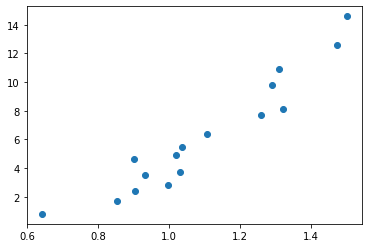

In [ ]:
plt.scatter(dataWithStatistics['Avg Score'], dataWithStatistics['Gold']);

Embora sejam variáveis correlacionadas, a "força" não é o único fator, pois há dependencia também da sequência de partidas contra adversários diferentes

*Questão 5: Qual a probabilidade de todos cabeça de chave passarem simultâneamente para a segunda fase? (Probabilidade da 'zebra')*


In [ ]:
# the intersection probability is multiplication of the probabilities if they are independent
groupFavs = dataWithStatistics.loc[dataWithStatistics['Cabeça-de-chave'] == 'Sim']
print('{:0.1f}%'.format(100 * (groupFavs['Group-1st'] / 100 + groupFavs['Group-2nd'] / 100).prod()))

19.3%


*Questão 6: Qual a probabilidade de pelo menos uma das quatro seleções mais fracas ganhar a competição?*


In [ ]:
weaskestTeams = dataWithStatistics.sort_values(by = 'Ranking FIFA (07/04)', ascending = False).iloc[:4]
print('{:0.1f}%'.format(weaskestTeams['Gold'].sum()))

9.5%


*Questão 7: Qual a probabilidade de vencer a competição por confederação?*


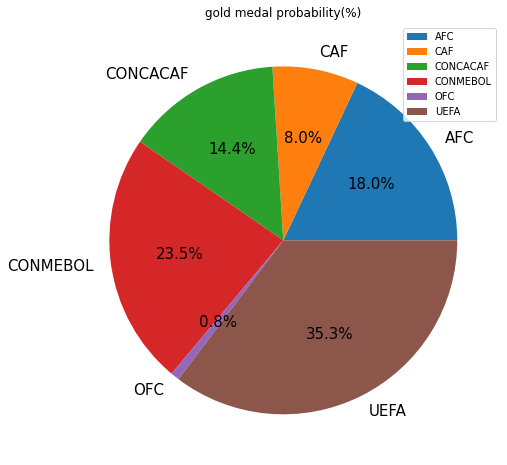

In [ ]:
confedGoldData = pd.DataFrame(dataWithStatistics['Gold'].groupby(
    dataWithStatistics['Confederação']).sum())

confedGoldData.plot(
    kind= 'pie',
    y= 'Gold',
    figsize= (8,8),
    fontsize= 15,
    autopct='%1.1f%%',
    title= 'gold medal probability(%)',
    ylabel= '')

*Questão 8: Qual a probabilidade de uma seleção sem medalhas em sua história vencer a competição?*


In [ ]:
teamWithoutMedals = dataWithStatistics.loc[dataWithStatistics['Ouros'] +
                                           dataWithStatistics['Pratas'] +
                                           dataWithStatistics['Bronzes'] == 0]
print('{:0.1f}%'.format(teamWithoutMedals['Gold'].sum()))

36.3%


*Questão 9: Se o Brasil jogar com a Alemanha, qual a probabilidade de acontecer um 7x1 para a Alemanha? E um 7x1 para o Brasil? Quais os (10) placares mais prováveis?*


In [ ]:
probMatrixBrazilGermany = resultProbability('Brasil', 'Alemanha', 10000)
print('Alemanha 7 x 1 Brasil: {:.3f}%'.format(probMatrixBrazilGermany.at[1,7]))
print('Brasil 7 x 1 Alemanha: {:.3f}%'.format(probMatrixBrazilGermany.at[7,1]))

Alemanha 7 x 1 Brasil: 0.000%
Brasil 7 x 1 Alemanha: 0.030%


In [ ]:
probTableBrazilGermany = probMatrixBrazilGermany.copy()
probTableBrazilGermany['Brasil'] = probTableBrazilGermany.index
probTableBrazilGermany = probTableBrazilGermany.melt(id_vars= ['Brasil'], value_name= 'Match Score Probab. (%)')
display(probTableBrazilGermany.sort_values('Match Score Probab. (%)', ascending= False, ignore_index= True).iloc[:10])

,Brasil,Alemanha,Match Score Probab. (%)
0,1,1,12.30
1,1,0,9.69
2,0,1,8.15
3,2,1,8.05
4,1,2,7.75
5,2,0,7.05
6,0,0,6.36
7,2,2,5.61
8,0,2,5.39
9,3,1,4.41


*Questão 10: Qual a probabilidade de cada grupo apresentar um campeão?*


In [ ]:
display(pd.DataFrame(dataWithStatistics['Gold'].groupby(dataWithStatistics['Grupo']).sum()))

,Gold
Grupo,
A,32.5
B,15.8
C,25.5
D,26.2


## **Melhorias e Comentários**
1. Modelar os gols marcados por time num jogo com dados reais, usando por exemplo regressão Poisson.
2. Performance do código: como esse projeto era um estudo da biblioteca Pandas com base no projeto da FLAI, não foi priorizada a otimização de algoritmos, por isso algumas células são bem lentas para executar. Além disso, há variás maneiras de resolver o mesmo problema exposta, seria interessante um estudo para entender qual se aplica melhor em cada caso e não apenas manter essa aleatoriedade.
